In [2]:
import pandas as pd
df = pd.read_csv(r"C:\Users\hp\Downloads\archive\Admission_Predict_Ver1.1.csv")
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
print(df.columns.tolist())

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [14]:
X = df.drop(columns = ['Chance of Admit '])
y = df['Chance of Admit ']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, random_state = 42)

In [ ]:
X = df.drop(columns = ['Chance of Admit '])
y = df['Chance of Admit ']

In [16]:
X.shape, y.shape

((500, 8), (500,))

In [17]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# Change 'input_dim' to match the number of columns in X_train_scaled
# Based on your error, this should be 7 or 8
model.add(Dense(16, activation='relu', input_dim=X_train_scaled.shape[1])) 

model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear')) # Assuming regression for 'Chance of Admit'

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')
# # Change this in your model.compile()
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])



In [23]:
print(X_train_scaled.shape)

(400, 8)


In [24]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.3395 - val_loss: 0.2691
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2314 - val_loss: 0.1784
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1467 - val_loss: 0.1064
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0836 - val_loss: 0.0534
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0406 - val_loss: 0.0220
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0176 - val_loss: 0.0103
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0106 - val_loss: 0.0094
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0095 - val_loss: 0.0090
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0087 - val_loss: 0.0081
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

In [25]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
import numpy as np
new_data = np.array([[337, 118, 4, 4.5, 4.5, 9.65, 1,2]]) 

new_data_scaled = scaler.transform(new_data)

prediction = model.predict(new_data_scaled)

print(f"Predicted Chance of Admit: {prediction[0][0]:.2f}")

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
Predicted Chance of Admit: 0.45


In [ ]:
r2_score(y_test, y_pred)

0.8023275647950636

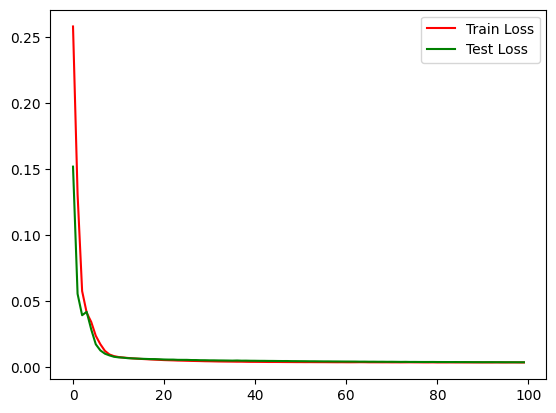

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color = 'red', label = 'Train Loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'Test Loss')
plt.legend()
plt.show()